In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

# 设置随机种子以确保结果可复现
np.random.seed(42)

## 单一颜色

In [2]:
def plot_fig(df: pd.DataFrame, color: str, offset: float, scale_factor: float, ylim: list, x_pad: float) -> None:
    # 创建画布
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.stripplot(data=df, color=color, alpha=0.3, jitter=True, ax=ax)  # 绘制散点图
    for i, col in enumerate(df.columns):
        num_lines_before = len(ax.lines)  # 记录已有的 Line2D 数量
        sns.kdeplot(y=df[col], bw_adjust=0.5, ax=ax, lw=0)  # 直接在 ax 绘制 KDE 曲线

        new_kde_line = ax.lines[num_lines_before]  # 取新增的那条线
        kde_y, kde_x = new_kde_line.get_data()  # 获取 KDE 数据 (y=密度, x=数值)
        
        ax.fill_betweenx(kde_x, i + offset, i + offset + scale_factor * kde_y / kde_y.max(), color=color, alpha=0.5)  # 在 x 轴上偏移

    # 调整刻度
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=90, color=color, fontsize=14)  # 设置 x 轴刻度: 标签旋转, 颜色, 字体大小
    ax.tick_params(axis="x", length=0, direction="in", pad=x_pad)  # 设置 x 轴刻度: 刻度线长度为 0, 方向向内, 位置调整
    ax.tick_params(axis="y", length=5, width=2, direction="out")
    ax.grid(axis="both", linestyle="--", color=color, alpha=0.5)  # 设置 x 轴网格线: 方向, 线型, 透明度
    ax.set_axisbelow(True)  # 确保网格线在底层
    ax.set_xlabel("Groups", color="black", fontsize=14)
    ax.set_ylabel("Values", color="black", fontsize=14)
    ax.set_title("Scatter Plot and Side KDE", fontsize=18)
    # 加粗边框
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.show()

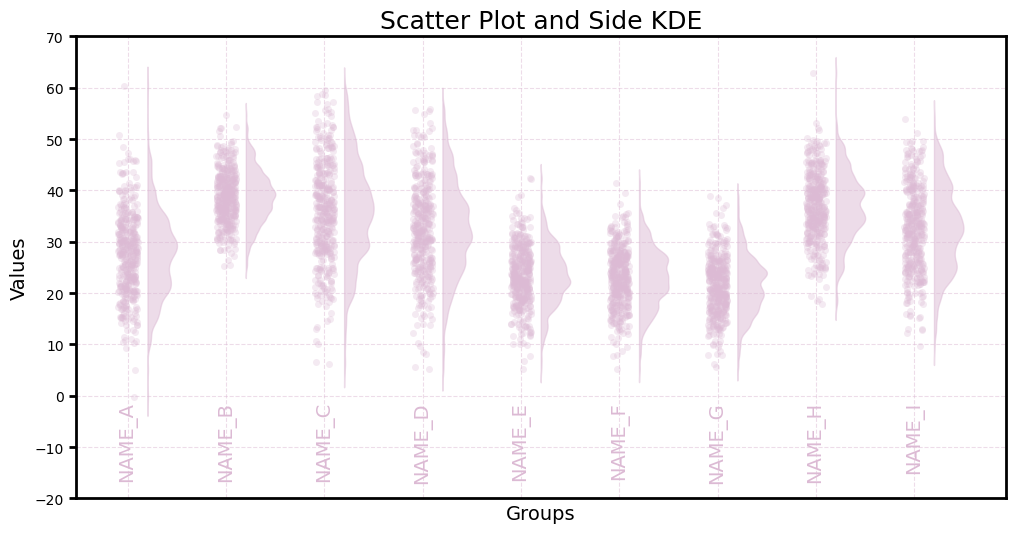

In [3]:
# 生成数据
means = np.random.uniform(20, 40, 9)  # 每列的均值
stds = np.random.uniform(5, 10, 9)  # 每列的标准差
data = {'NAME_' + chr(65 + i): np.random.normal(loc=means[i], scale=stds[i], size=400) for i in range(9)}  # 9组数据

df = pd.DataFrame(data)  # 生成 DataFrame
color = '#dcbad4'  # 设置颜色
offset = 0.2  # 设置偏移量
scale_factor = 0.3  # 设置宽度
ylim = [-20, 70]  # 设置 y 轴范围
x_pad = -70  # 设置 x 轴刻度标签位置

plot_fig(df, color, offset, scale_factor, ylim, x_pad)

## 多颜色

In [4]:
def plot_fig(df: pd.DataFrame, colors: list, offset: float, offset_box: float, scale_factor: float) -> None:
    # 创建网格布局
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.1)  # 3:1 比例
    ax = fig.add_subplot(gs[0])  # 左侧主图
    legend_ax = fig.add_subplot(gs[1])  # 右侧图例
    legend_ax.axis('off')  # 关闭图例坐标轴

    # 绘制散点图
    sns.stripplot(data=df, alpha=0.4, jitter=True, ax=ax, orient="h", palette=colors)
    for line in ax.collections:
        line.set_offsets(line.get_offsets() + [0, (-offset_box)])

    # 添加箱线图
    sns.boxplot(data=df, width=0.25, orient="h", fliersize=0, linewidth=1, palette=colors, ax=ax)
    for i, patch in enumerate(ax.patches):
        verts = patch.get_path().vertices
        verts[:, 1] -= (offset_box)
        patch.set_path(patch.get_path())
        patch.set_linewidth(2)
        patch.set_alpha(0.7)
        patch.set_edgecolor(colors[i])
    for i, line in enumerate(ax.lines):
        y_data = line.get_ydata()
        line.set_ydata(y_data - offset_box)
        line.set_linewidth(2)
        line.set_alpha(0.8)
        line.set_color(colors[i // 6])

    # 绘制 KDE 曲线
    for i, col in enumerate(df.columns):
        num_lines_before = len(ax.lines)
        sns.kdeplot(x=df[col], bw_adjust=0.5, ax=ax, lw=0)
        new_kde_line = ax.lines[num_lines_before]
        kde_x, kde_y = new_kde_line.get_data()
        ax.fill_between(kde_x, i + offset, i + offset + scale_factor * kde_y / kde_y.max(), color=colors[i], alpha=0.7, lw=2)

    # 轴设置
    ax.tick_params(axis="x", length=5, width=2, direction="out")  
    ax.tick_params(axis="y", length=5, width=2, direction="out")
    ax.set_xlabel("Values", color="black", fontsize=14)
    ax.set_ylabel("Groups", color="black", fontsize=14)

    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # 绘制自定义图例
    legend_elements = [Patch(facecolor=colors[i], edgecolor=colors[i], linewidth=2, alpha=0.7, label=f"Group {i}") for i in range(len(df.columns))]
    legend_ax.legend(handles=legend_elements, title="Legend", loc="center", fontsize=12, title_fontsize=14, shadow=True, fancybox=True)

    fig.suptitle("Scatter Plot and Side KDE", fontsize=18)
    plt.show()

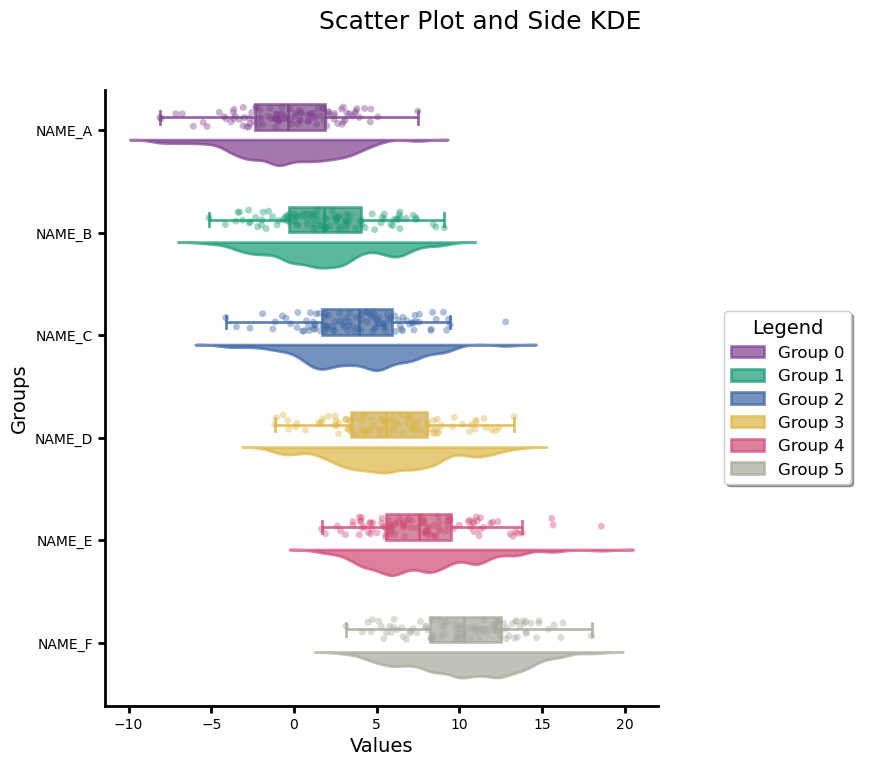

In [5]:
num_groups = 6  # 组数
num_points = 100  # 每组数据点数
data = {'NAME_' + chr(65 + i): np.random.normal(loc=i * 2, scale=3, size=num_points) for i in range(num_groups)}

df = pd.DataFrame(data)
offset_kde = 0.09
offset_box = 0.13
scale_factor = 0.25  
colors = ['#7e3f8e','#179b72','#3864a3','#ddb544','#d04a74','#a6a89b']

plot_fig(df, colors, offset_kde, offset_box, scale_factor)